# Train and evaluate models

This notebooks shows how to train, predict and cluster models. Alternatively to executing each step here, the cli can be used for training models:
```
campa train all --config $CAMPA_DIR/notebooks/params/example_experiment_params.py
```

for evaluation or comparison only, use
```
campa train compare --experiment-dir test
```

The models will be saved in `EXPERIMENT_DIR/test`, with the `EXPERIMENT_DIR` being the custom experiment path set up in `campa.ini`.

In [1]:
from campa.tl import (
    Cluster,
    Estimator,
    Predictor,
    Experiment,
    ModelComparator,
    run_experiments,
)
from campa.constants import EXPERIMENT_DIR, get_data_config

# comment in to get logging messages
# logging.basicConfig(level=logging.INFO)


data_config = get_data_config("TestData")
print(EXPERIMENT_DIR)

Reading config from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/config.ini
/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new


## Experiment class handles config files
For training and evaluating models, an `experiment_params.py` file is used. This file contains several model/experiment parameters for easy training of several models at the same time. The parameter dictionaries contain several sections:
- experiment (where to save experiment)
- data (which dataset to use for training)
- model (model class definition)
- training (training hyperparameters)
- evaluation (evaluation on val/test split)
- cluster (clustering on val/test split)

The `Experiment` class is initialised from a parameter dictionary for one specific experiment and is passed to specific classes for training (`Estimator`), evaluation (`Predictor`), and clustering (`Cluster`).

Here, we are going to be using an [example experiment config](params/example_experiment_params.py) that creates three models:
- `condVAE`: a cVAE model trained on the example dataset created in [the NNDataset tutorial](nn_dataset.ipynb), using perturbation (unperturbed or Meayamycin) and cell cycle as conditions
- `VAE`: a VAE model trained on the example dataset created in [the NNDataset tutorial](nn_dataset.ipynb), 
- `MPPleiden`: a non-traineable model that is used to create a direct pixel clustering, to compare with the cVAE latent space clustering.


In [2]:
# get Experiments from config
exps = Experiment.get_experiments_from_config("params/example_experiment_params.py")

# each experiment has one specific config
exps[0].config

{'experiment': {'dir': 'test', 'name': 'VAE', 'save_config': True},
 'data': {'data_config': 'TestData',
  'dataset_name': '184A1_test_dataset',
  'output_channels': None},
 'model': {'model_cls': <ModelEnum.VAEModel: 'VAEModel'>,
  'model_kwargs': {'num_neighbors': 3,
   'num_channels': 34,
   'num_output_channels': 34,
   'latent_dim': 16,
   'encoder_conv_layers': [32],
   'encoder_conv_kernel_size': [1],
   'encoder_fc_layers': [32, 16],
   'decoder_fc_layers': []},
  'init_with_weights': False},
 'training': {'learning_rate': 0.001,
  'epochs': 10,
  'batch_size': 128,
  'loss': {'decoder': <LossEnum.SIGMA_MSE: 'sigma_vae_mse'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'loss_weights': {'decoder': 1},
  'loss_warmup_to_epoch': {},
  'metrics': {'decoder': <LossEnum.MSE_metric: 'mean_squared_error_metric'>,
   'latent': <LossEnum.KL: 'kl_divergence'>},
  'save_model_weights': True,
  'save_history': True,
  'overwrite_history': True},
 'evaluation': {'split': 'val',
  'predic

## Running experiments with the high-level api

The high-level api contains a `run_experiments` function that wraps training, evaluation, clustering and comparison of models in one call. 

In [16]:
run_experiments(exps, mode="trainval")

INFO:VAEModel:Creating model
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for 

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE


INFO:Estimator:Training model for 10 epochs


Epoch 1/10
394/394 [==============================] - 11s 21ms/step - loss: 164.7024 - decoder_loss: 159.6780 - latent_loss: 5.0252 - decoder_mean_squared_error: 0.1396 - latent_kl_loss: 5.0290 - val_loss: -1575.6914 - val_decoder_loss: -1583.8151 - val_latent_loss: 8.1240 - val_decoder_mean_squared_error: 0.0292 - val_latent_kl_loss: 8.1259
Epoch 2/10
394/394 [==============================] - 9s 20ms/step - loss: -1963.2466 - decoder_loss: -1970.8730 - latent_loss: 7.6253 - decoder_mean_squared_error: 0.0238 - latent_kl_loss: 7.6260 - val_loss: -1963.2028 - val_decoder_loss: -1971.5024 - val_latent_loss: 8.2996 - val_decoder_mean_squared_error: 0.0247 - val_latent_kl_loss: 8.3012
Epoch 3/10
394/394 [==============================] - 13s 27ms/step - loss: -2247.1587 - decoder_loss: -2254.8916 - latent_loss: 7.7336 - decoder_mean_squared_error: 0.0208 - latent_kl_loss: 7.7351 - val_loss: -2062.3311 - val_decoder_loss: -2070.7485 - val_latent_loss: 8.4174 - val_decoder_mean_squared_erro

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010
INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010


Evaluating model for VAE


INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for NascentRNA (123401 mpps with 

Clustering results for VAE


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/VAE/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].
INFO:Cluster:Creating leiden clustering


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val/clustering.npy


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val (keys: ['x', 'clustering', 'umap', 'obj_ids', 'y'])
INFO:Predictor:Creating Predictor for test/VAE
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/exa

Training model for CondVAE_pert-CC


INFO:MPPData:Created new: MPPData for NascentRNA (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Created new: MPPData for NascentRNA (45418 mpps with shape (1, 1, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test_imgs.
INFO:Estimator:Training model for 10 epochs


Epoch 1/10
394/394 [==============================] - 12s 23ms/step - loss: -539.3878 - decoder_loss: -544.1520 - latent_loss: 4.7644 - decoder_mean_squared_error: 0.0840 - latent_kl_loss: 4.7680 - val_loss: -1577.1989 - val_decoder_loss: -1583.9397 - val_latent_loss: 6.7409 - val_decoder_mean_squared_error: 0.0292 - val_latent_kl_loss: 6.7419
Epoch 2/10
394/394 [==============================] - 10s 23ms/step - loss: -2041.9589 - decoder_loss: -2048.4961 - latent_loss: 6.5375 - decoder_mean_squared_error: 0.0229 - latent_kl_loss: 6.5367 - val_loss: -1861.6360 - val_decoder_loss: -1868.7666 - val_latent_loss: 7.1302 - val_decoder_mean_squared_error: 0.0258 - val_latent_kl_loss: 7.1311
Epoch 3/10
394/394 [==============================] - 11s 24ms/step - loss: -2231.0808 - decoder_loss: -2237.7966 - latent_loss: 6.7155 - decoder_mean_squared_error: 0.0210 - latent_kl_loss: 6.7146 - val_loss: -1944.2587 - val_decoder_loss: -1951.5924 - val_latent_loss: 7.3333 - val_decoder_mean_squared_e

INFO:Estimator:Saving model to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010


Evaluating model for CondVAE_pert-CC


INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/test.
INFO:MPPData:Created new: MPPData for NascentRNA (123401 mpps with 

Clustering results for CondVAE_pert-CC


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].
INFO:Cluster:Creating leiden clustering


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['x', 'clustering', 'umap', 'obj_ids', 'y'])
INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkm

Clustering results for MPPleiden


INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/MPPleiden/results_epoch000/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'clustering', 'umap'].
INFO:Cluster:Creating leiden clustering


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val/clustering.npy


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for mpp
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val (keys: ['x', 'clustering', 'umap', 'obj_ids', 'y'])
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'conditions', 'labels', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
IN

## Running experiments with Estimator and Predictr
### Neural network training with Estimator
The `Estimator` class handles model setup, training, and prediction. It is instanciated from an `Experiment`.


In [3]:
est = Estimator(exps[0])

2022-03-24 10:49:31.288207: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The `train_model` function is used to train the experiment.

In [4]:
est.train_model()

Epoch 1/10
    192/Unknown - 7s 22ms/step - loss: 1544.2701 - decoder_loss: 1534.6796 - latent_loss: 9.5906 - decoder_mean_squared_error: 0.2296 - latent_kl_loss: 9.5906


###  Predict val split and images with Predictor
The `Predictor` class can evaluate and predict new data from trained models. It is instanciated with an `Experiment`.

In [5]:
pred = Predictor(exps[0])

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_

In [6]:
pred.evaluate_model()

INFO:Predictor:Predicting split val for test/CondVAE_pert-CC
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['x', 'latent', 'obj_ids', 'decoder', 'y'])
INFO:Predictor:Predicting split val_imgs for test/CondVAE_pert-CC
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
INFO:MPPData:Adding neighborhood of size 3
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs (keys: ['x', 'latent', 'obj_ids', 'decoder', 'y'])


### Cluster resulting latent space with Cluster
To get a quick overview of the generated latent space and the clustering of the latent space, we can use the `Cluster` class to cluster the evaluation split of the data. 
To generate the final clustering utilising the entire dataset, have a look at [the clustering tutorial](cluster.ipynb). 

In [7]:
cl = Cluster.from_exp_split(exps[1])

INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap']
INFO:MPPData:Loaded data from test/CondVAE_pert-CC/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:Cluster:Loaded cluster_mpp MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap'].


Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy


cluster the val split of the dataset

In [8]:
cl.config["leiden_resolution"]

0.2

In [9]:
cl.create_clustering()

INFO:Cluster:Creating leiden clustering
/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
INFO:Cluster:Calculating umap
INFO:Cluster:Creating pynndescent index for latent
INFO:MPPData:Saving mpp data to /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val (keys: ['x', 'clustering', 'umap', 'obj_ids', 'y'])


In [17]:
# import scanpy as sc
# adata = cl.cluster_mpp.get_adata(obsm={"X_umap": "umap"}, obs=['clustering'])
# sc.pl.umap(adata, color=['clustering', 'perturbation_duration'])

In [59]:
# predict cluster images
_ = cl.predict_cluster_imgs(exps[1])

INFO:Predictor:Creating Predictor for test/CondVAE_pert-CC
INFO:VAEModel:Creating model
INFO:Estimator:Initializing model with weights from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/weights_epoch010
INFO:MPPData:Created new: MPPData for NascentRNA (50310 mpps with shape (3, 3, 34) from 35 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/train.
INFO:MPPData:Created new: MPPData for NascentRNA (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp', 'labels', 'conditions'].
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/software_new/campa/notebooks/example_data/datasets/184A1_test_dataset/val.
INFO:MPPData:Created new: MPPData for NascentRNA (4541 mpps with shape (3, 3, 34) from 3 objects). Data keys: ['x', 'y', 'obj_

## Plot results using ModelComparator
The `ModelComparator` class is a convenience class to allow quick comparison between different models.
Below, we will compare the `condVAE`, `VAE` and `MPPleiden` experiments that we just trained.

In [18]:
# get saved experiments from dir
exps = Experiment.get_experiments_from_dir("test")
comp = ModelComparator(exps)

INFO:Experiment:Setting up experiment test/CondVAE_pert-CC
INFO:Experiment:Initialised from existing experiment in test/CondVAE_pert-CC
INFO:Experiment:Setting up experiment test/MPPleiden
INFO:Experiment:Initialised from existing experiment in test/MPPleiden
INFO:Experiment:Setting up experiment test/VAE
INFO:Experiment:Initialised from existing experiment in test/VAE
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'decoder', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap', 'decoder']
INFO:MPPData:Loaded

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val/clustering.npy


INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (3, 3, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (12340 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'latent', 'clustering', 'umap', 'decoder', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 8 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'umap', 'decoder']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val, with base data from datasets/184A1_test_dataset/val
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_img

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs/clustering.npy


INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'latent', 'clustering', 'decoder']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val_imgs, with base data from datasets/184A1_test_dataset/val_imgs
INFO:MPPData:Created new: MPPData for TestData (123401 mpps with shape (1, 1, 34) from 8 objects). Data keys: ['x', 'y', 'obj_ids', 'mpp'].
INFO:MPPData:Loaded data from datasets/184A1_test_dataset/val_imgs.
INFO:MPPData:Setting mpp to empty array
INFO:MPPData:Created new: MPPData for TestData (40812 mpps with shape (1, 1, 34) from 2 objects). Data keys: ['x', 'y', 'obj_ids', 'clustering', 'mpp'].
INFO:MPPData:Before subsetting: 8 objects
INFO:MPPData:Subsetting to 2 objects
INFO:MPPData:Updated data to keys ['x', 'y', 'obj_ids', 'mpp', 'clustering']
INFO:MPPData:Loaded data from /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/va

Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val_imgs/clustering.npy


The loss and MSE summary plots show how the `VAE` and `cVAE` model perform with respect to reconstructing the input.
Both models seem to be trained well, as indicated by the asymptotic loss curves

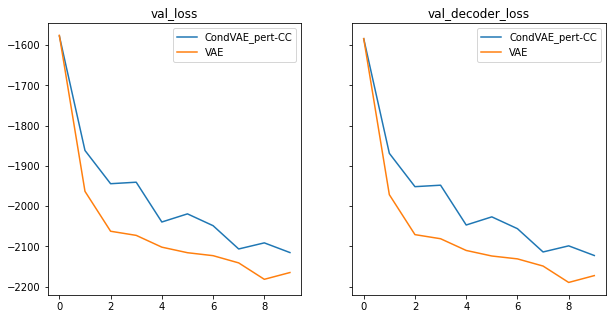

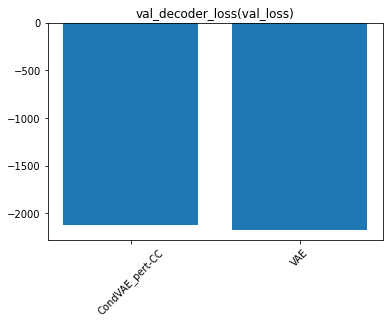

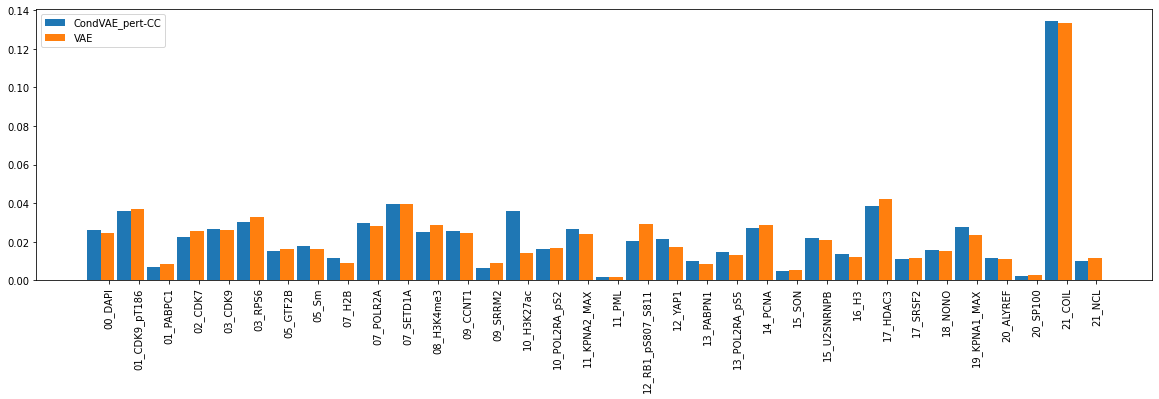

In [19]:
comp.plot_history(values=["val_loss", "val_decoder_loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()

The two example images show that both models can predict the original inputs well

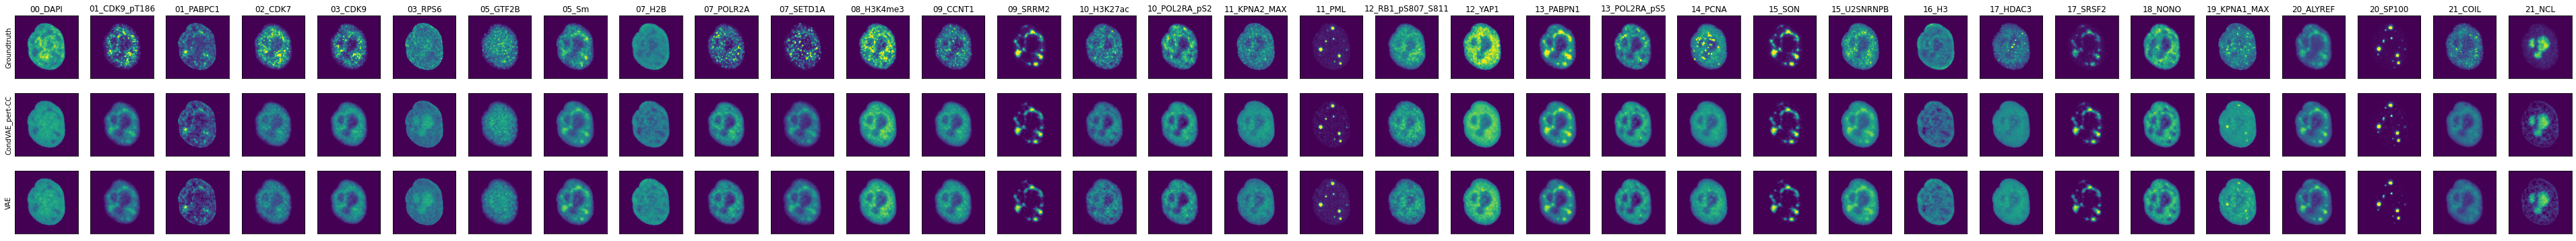

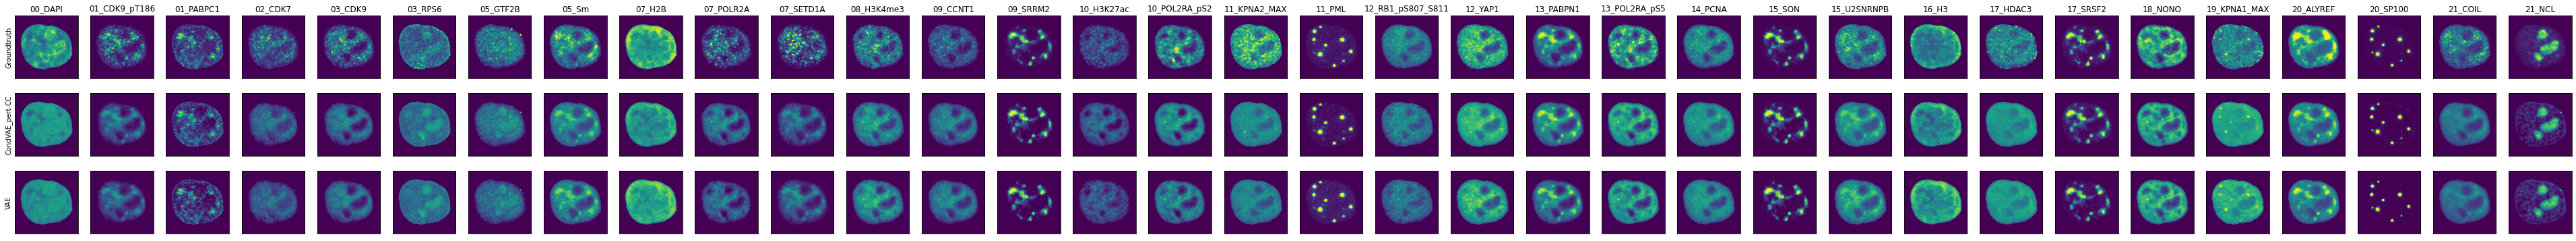

In [23]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

The example leiden clustering (here with resolution 0.2 as set in the `experiment_params.py`) shows some differences between the models.
Even on these two example cells, the `MPPleiden` experiment (direct pixel clustering) seems to be less consistent across the cells. 
The `condVAE` clustering has distinct clusters for the periphery of some of the detected clusters. This is due to the training with a small local neighborhood and the very limited data size in this toy example (only 10 cells from each perturbation). To remove this effect and train without a local neighborhood, set `num_neighbors` in the model definition in the `experiment_params` and in the dataset definition in the `data_params` to 1.

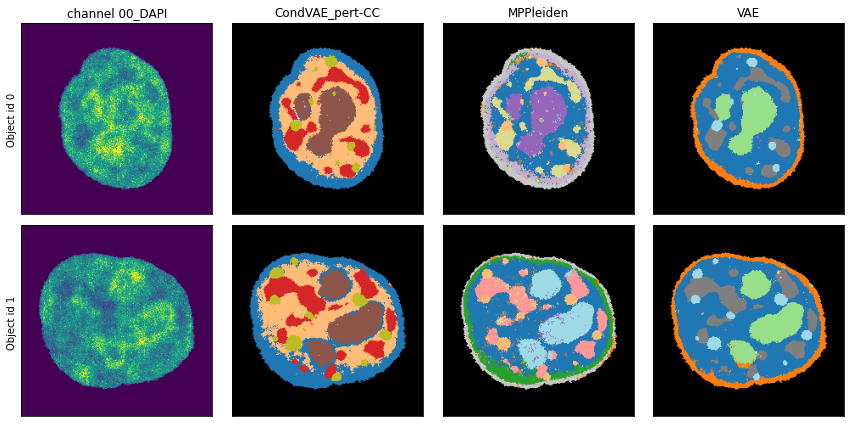

In [24]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

The pixel-level UMAP representations of the learned latent representations and the original molecular pixel profiles show that the `condVAE` integrated the two perturbation best. In the two other UMAPs, several clusters are entirely only in one perturbation

/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/CondVAE_pert-CC/results_epoch010/val


... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


['perturbation_duration', 'cell_cycle']


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/MPPleiden/results_epoch000/val
['perturbation_duration', 'cell_cycle']


/Users/hannah.spitzer/opt/miniconda3/envs/campa/lib/python3.9/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
... storing 'plate_name' as categorical
... storing 'well_name' as categorical
... storing 'plate_name_cell' as categorical
... storing 'well_name_cell' as categorical
... storing 'cell_cycle' as categorical
... storing 'description' as categorical
... storing 'dimensions' as categorical
... storing 'cell_type' as categorical
... storing 'perturbation' as categorical
... storing 'perturbation_duration' as categorical


/Users/hannah.spitzer/projects/pelkmans/local_experiments/NascentRNA_new/test/VAE/results_epoch010/val
['perturbation_duration', 'cell_cycle']


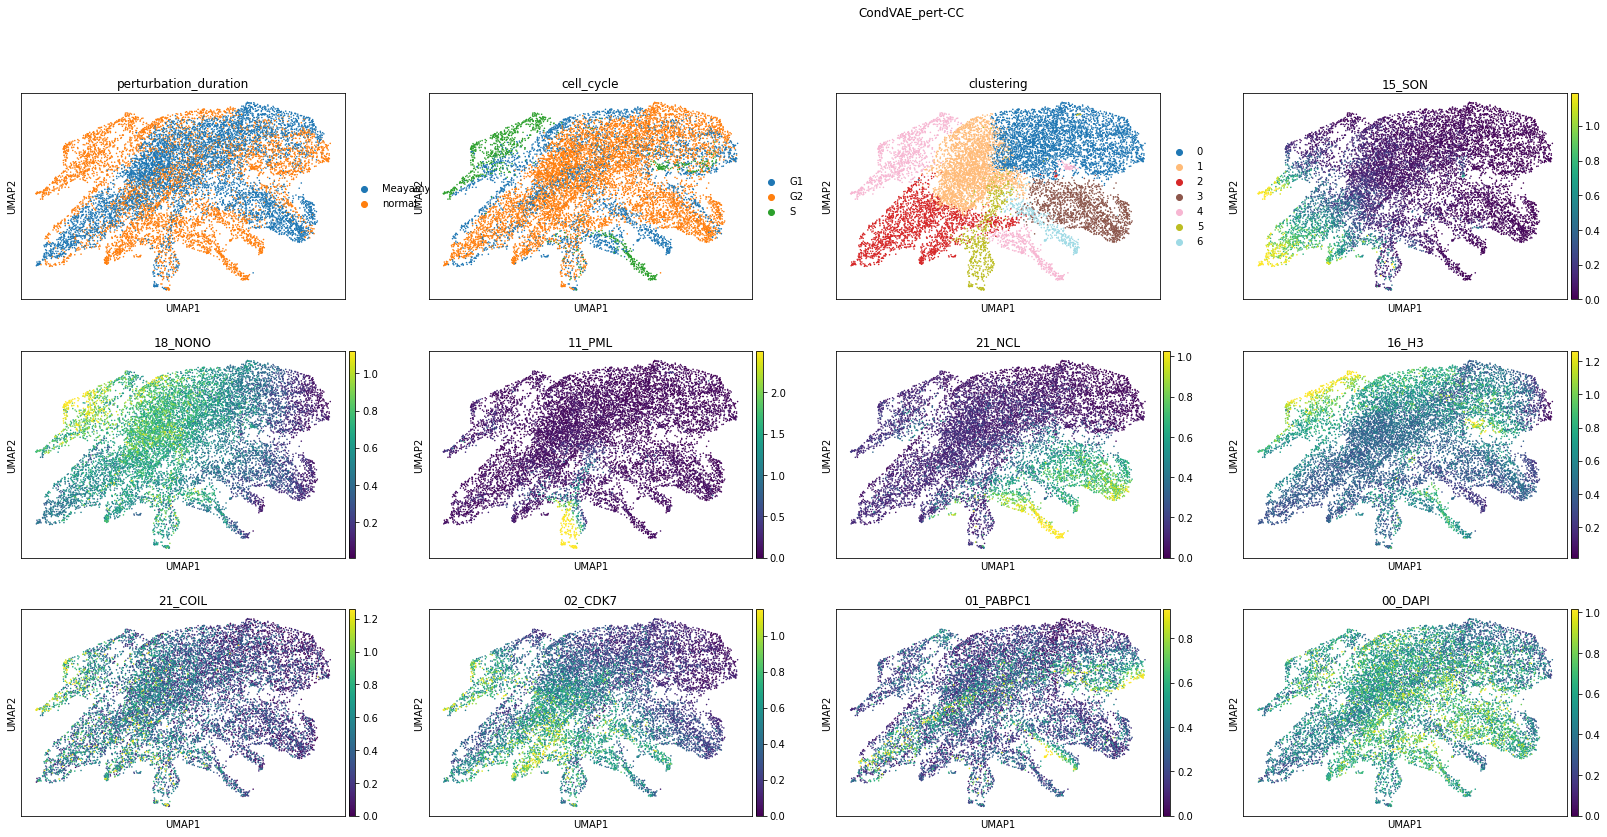

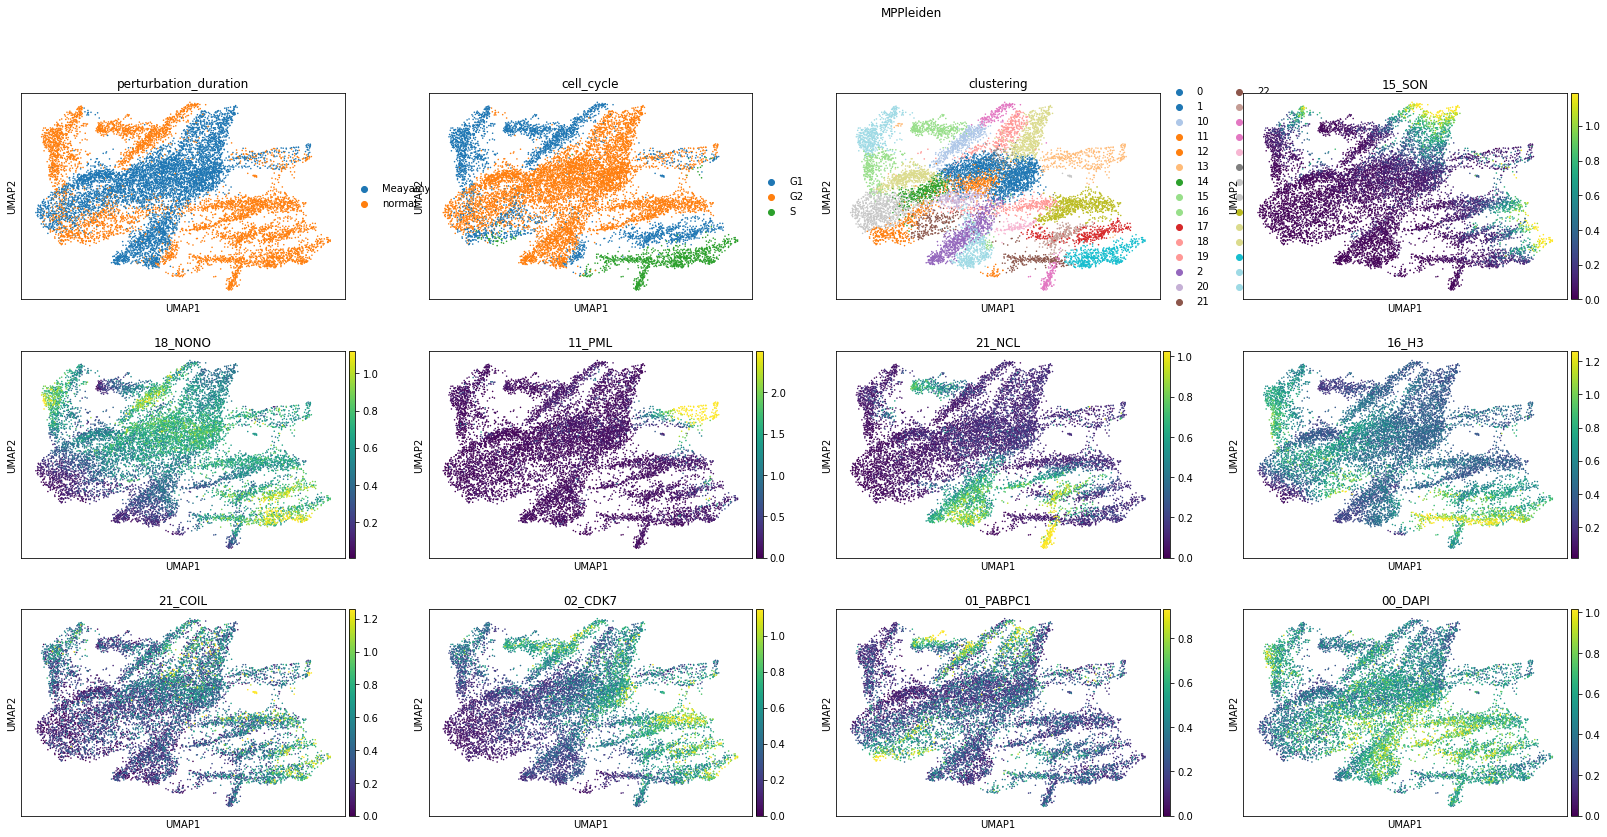

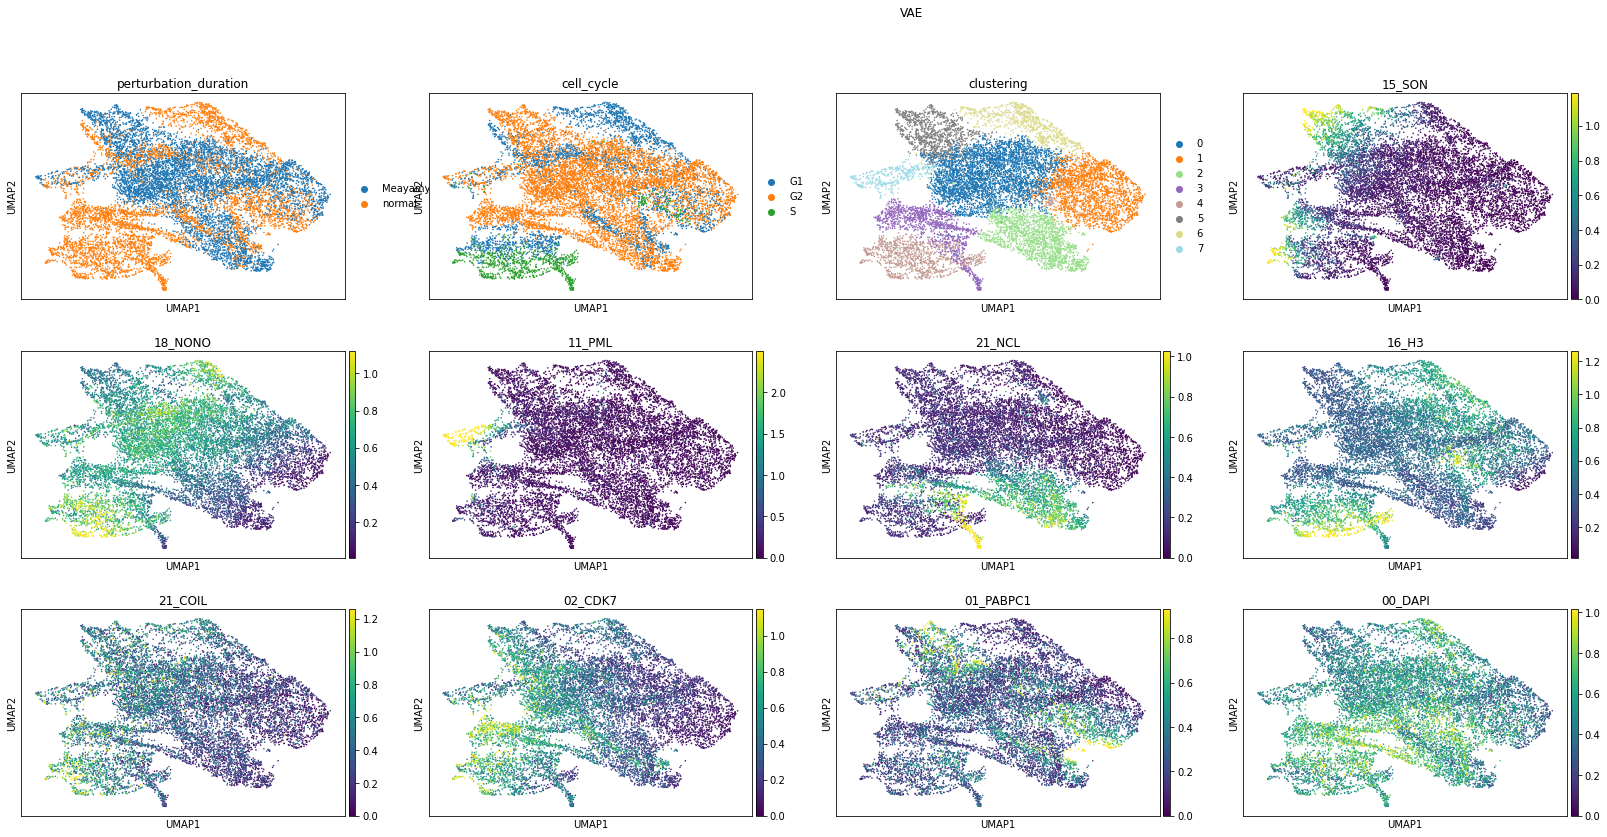

In [22]:
comp.plot_umap()